In [1]:
using BifurcationKit, LinearAlgebra, Plots, SparseArrays, Parameters, Setfield
const BK = BifurcationKit
using LaTeXStrings
using Interpolations
include("Additional_Function_Migration_model_PNAS.jl")

Main.Extra_Migration

In [2]:
N=100
function Fun_travelling_wave(X,p)
    @unpack W=p
    U=X[end-1]
    M=X[end]
    residual=similar(X)
    Extra_Migration.FH(residual,X[1:end-2],W,U,M,p,N)
    return residual
end

function plot_fun(el,namevar)
    if namevar=="M"
        return el.x[end]*0.1*0.065
    elseif namevar=="L"
        return el.p*100
    else
        return el.x[end-1]*12.5
    end
end


plot_fun (generic function with 1 method)

In [7]:
par_mod=(E = 0.335, K = 5.75, A = 5.75, Lsd = 0.08, α=2., nα=1, U = 0.05, W = 1.0, M = 2.0, θ = 1.,S=Extra_Migration.DS, γ = 9.6, mu0 =0.2, expDC = log10(9.6), filename="initial_cond.txt")


(E = 0.335, K = 5.75, A = 5.75, Lsd = 0.08, α = 2.0, nα = 1, U = 0.05, W = 1.0, M = 2.0, θ = 1.0, S = Main.Extra_Migration.DS, γ = 9.6, mu0 = 0.2, expDC = 0.9822712330395684, filename = "initial_cond.txt")

In [8]:
sol0=Extra_Migration.initial_cond(N,par_mod,false);
list_A_values=[1.,3.,5.75,8.5,10.5]
sol_dic=Dict();

No initial condition available. Default given


In [9]:
for A in list_A_values
    par_mod=@set par_mod.A=A
    opt_newton = NewtonPar(tol = 1e-9, verbose =false,maxIter=20)
    prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)
    out=  newton(prob, opt_newton);
    sol0=out.u
    print("Computing bifurcation diagram for A = "*string(A)*"\n")
    prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)

    opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 3)
    opts_br = ContinuationPar(dsmin=0.0005,dsmax=0.01,ds=0.001, pMin=0.01,pMax=15.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=4000)
    branch=BK.continuation(prob,PALC(),opts_br;plot=false,bothside=true);
    sol_dic[A]=branch
end

Computing bifurcation diagram for A = 1.0
Computing bifurcation diagram for A = 3.0
Computing bifurcation diagram for A = 5.75
Computing bifurcation diagram for A = 8.5
Computing bifurcation diagram for A = 10.5


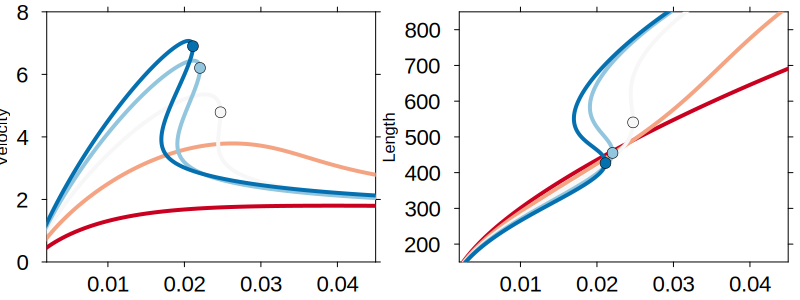

In [11]:
cl=get_color_palette(:RdBu_5,5)
ncl=1
p1=plot(layout=(1,2),size=(800,300))

plot_font = "Helvetica"
default(fontfamily=plot_font,framestyle=:box, label=nothing, grid=false,tickfont = font(15, "Helvetica"),tick_direction=:out,thickness_scaling = 1.)
ylim_top=[2.2,1.45,1.75]
for A in list_A_values[1:end]
    plot!(p1,plot_fun.(sol_dic[A].sol,"M"),plot_fun.(sol_dic[A].sol,"U"),label="A = "*string(A),lw=4.,color=cl[ncl],subplot=1)
    plot!(p1,plot_fun.(sol_dic[A].sol,"M"),plot_fun.(sol_dic[A].sol,"L"),label="A = "*string(A),lw=4.,color=cl[ncl],subplot=2)

    M=plot_fun.(sol_dic[A].sol,"M")
    dM=M[2:end]-M[1:end-1]
    idx=findall(dM[1:end-1].*dM[2:end].<0)
    if length(idx)>0
        scatter!(p1,M[idx[1:1]],plot_fun.(sol_dic[A].sol,"U")[idx[1:1]],color=cl[ncl],label=false,markersize=6,subplot=1)
        scatter!(p1,M[idx[1:1]],plot_fun.(sol_dic[A].sol,"L")[idx[1:1]],color=cl[ncl],label=false,markersize=6,subplot=2)
    end
    ncl+=1
end

plot!(p1,xlabel="Volume",ylabel="Length",xlim=(0.002,0.045),ylim=(150,850),legend=false,subplot=2)
display(plot!(p1,xlabel="Volume",ylabel="Velocity",xlim=(0.002,0.045),ylim=(0.,8.),legend=false,subplot=1))
savefig("Bifurcation_activity_sensitivity_A.svg")

In [14]:
par_mod=@set par_mod.A=5.75
list_lsd_values=[0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.]
sol_dicls=Dict()
for A in list_lsd_values
    par_mod=@set par_mod.Lsd=A
    opt_newton = NewtonPar(tol = 1e-9, verbose =false,maxIter=20)
    prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)
    out=  newton(prob, opt_newton);
    sol0=out.u
    print("Computing bifurcation diagram for A = "*string(A)*"\n")
    prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)

    opt_newton = NewtonPar(tol = 1e-7, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0005,dsmax=0.5,ds=0.01, pMin=0.01,pMax=20.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=4000)
    branch=BK.continuation(prob,PALC(),opts_br;plot=false,bothside=true);
    sol_dicls[A]=branch
    
end

Computing bifurcation diagram for A = 0.01
Computing bifurcation diagram for A = 0.02
Computing bifurcation diagram for A = 0.04
Computing bifurcation diagram for A = 0.08
Computing bifurcation diagram for A = 0.16
Computing bifurcation diagram for A = 0.32
Computing bifurcation diagram for A = 0.64
Computing bifurcation diagram for A = 1.0


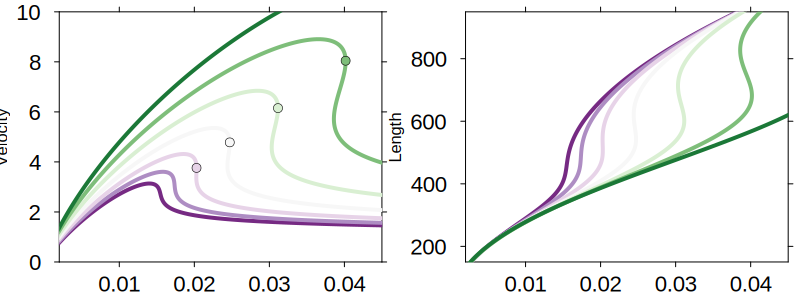

In [16]:
default(palette = palette(:roma10))

cl=get_color_palette(:PRGn_7,7)
ncl=1
p1=plot(layout=(1,2),size=(800,300))

plot_font = "Helvetica"
default(fontfamily=plot_font,framestyle=:box, label=nothing, grid=false,tickfont = font(15, "Helvetica"),tick_direction=:out,thickness_scaling = 1.)
ylim_top=[2.2,1.45,1.75]
for A in list_lsd_values[1:end-1]
    plot!(p1,plot_fun.(sol_dicls[A].sol,"M"),plot_fun.(sol_dicls[A].sol,"U"),label="A = "*string(A),lw=4.,color=cl[ncl],subplot=1)
    plot!(p1,plot_fun.(sol_dicls[A].sol,"M"),plot_fun.(sol_dicls[A].sol,"L"),label="A = "*string(A),lw=4.,color=cl[ncl],subplot=2)

    M=plot_fun.(sol_dicls[A].sol,"M")
    dM=M[2:end]-M[1:end-1]
    idx=findall(dM[1:end-1].*dM[2:end].<0)
    if length(idx)>0
        scatter!(p1,M[idx[1:1]],plot_fun.(sol_dicls[A].sol,"U")[idx[1:2]],color=cl[ncl],label=false,markersize=5.,subplot=1)
    end
    ncl+=1
end
plot!(p1,xlabel="Volume",ylabel="Length",xlim=(0.002,0.045),ylim=(150,950),legend=false,subplot=2)
display(plot!(p1,xlabel="Volume",ylabel="Velocity",xlim=(0.002,0.045),ylim=(0,10),legend=false,subplot=1))
savefig("Bifurcation_slip_sensitivity.svg")

In [ ]:
# save bifurcation diagram and corresponding solution in the directory indicated
# for each value of A a subfolder is created

namedir="bifurcation_diagram/"
Extra_Migration.save_solution(namedir,sol_dic,N,par_mod,"activity")
Extra_Migration.save_solution(namedir,sol_dicls,N,par_mod,"slip")